In [7]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from matplotlib import pyplot as plt
import copy
from netCDF4 import Dataset, num2date, date2num
import more_itertools as mit
from scipy import arange, cos, exp
from scipy.interpolate import RegularGridInterpolator
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn import metrics
from matplotlib import pyplot
import matplotlib.patches as patches
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from haversine import haversine, Unit
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import numpy as np
from scipy.stats import rankdata

import matplotlib.ticker as ticker
from matplotlib import colors as c
import csv
import pandas as pd

import matplotlib as mpl

import cc3d
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator

import matplotlib as mpl
import matplotlib.cm as cm
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from matplotlib.colors import from_levels_and_colors
import random
import cmaps
from haversine import haversine, Unit


# verification_1

In [27]:
lon_unin = np.arange(-180,180,2.5)
lat_unin = np.arange(-90,90,2.5)[::-1]
LON_unin, LAT_unin = np.meshgrid(lon_unin, lat_unin)

In [28]:
SH_all = []
SD_all = []
ADV_all = []
ADIA_all = []

for modelname in ['CanESM5/','INM-CM4-8/','INM-CM5-0/','MPI-ESM1-2-LR/','CMCC-ESM2/','IPSL-CM6A-LR/']:
    SH_temp = []
    SD_temp = []
    ADV_temp = []
    ADIA_temp = []
    for yearstart,yearend in zip([1979,2015,2025,2035,2045,2055],[2014,2060,2070,2080,2090,2100]):

        dataframe1 = pd.read_excel('/Net/Groups/BGI/scratch/yt/code/3D_HW_99th_connect6_cmip6_'+modelname+'percentagle_'+modelname[:-1]+'_'+str(yearstart)+'_'+str(yearend)+'.xlsx')
        SH_temp.append(dataframe1[str(yearstart)+'_'+str(yearend)][0])
        SD_temp.append(dataframe1[str(yearstart)+'_'+str(yearend)][1])
        ADV_temp.append(dataframe1[str(yearstart)+'_'+str(yearend)][2])
        ADIA_temp.append(dataframe1[str(yearstart)+'_'+str(yearend)][3])
    SH_all.append(np.array(SH_temp ))
    SD_all.append(np.array(SD_temp ))
    ADV_all.append(np.array(ADV_temp ))
    ADIA_all.append(np.array(ADIA_temp ))
per_all = [np.nanmean(SH_all,axis=0)[0],np.nanmean(SD_all,axis=0)[0],np.nanmean(ADV_all,axis=0)[0],np.nanmean(ADIA_all,axis=0)[0]]

In [29]:

map_all_all =  []
map_all = []

for modelname in ['CanESM5/','INM-CM4-8/','INM-CM5-0/','MPI-ESM1-2-LR/','CMCC-ESM2/','IPSL-CM6A-LR/']:
    map_temp = []
    SEB_temp = []
    for yearstart,yearend in zip([1979,2015,2025,2035,2045,2055],[2014,2060,2070,2080,2090,2100]):
        senarioname = 'ssp585'
        filelist_cmip6 = os.listdir(r'/Net/Groups/BGI/scratch/yt/data/Cmip6_ssp585_wget/'+modelname)

        filelist_cmip6 = np.array([i for i in filelist_cmip6 if i[:6]=='tasmax'])
        temp = r'/Net/Groups/BGI/scratch/yt/data/Cmip6_ssp585_wget/'+modelname+filelist_cmip6[0]
        grid_label = temp[temp.find('_g')+1:temp.find('_g')+1+temp[temp.find('_g')+1:].find('_')]

        filelist_cmip6_2 = np.array([np.int(i[-11:-7]) for i in filelist_cmip6])
        filelist_cmip6_1 = np.array([np.int(i[-20:-16]) for i in filelist_cmip6])
        filelist_cmip6 = np.array(filelist_cmip6)[~((filelist_cmip6_2<yearstart)|(filelist_cmip6_1>yearend))]   
        filelist_cmip6 = np.array(filelist_cmip6)[np.argsort(np.array([np.int(i[-20:-16]) for i in filelist_cmip6]))]

        filename = r'/Net/Groups/BGI/scratch/yt/data/Cmip6_ssp585_wget/'+modelname+filelist_cmip6[0]
        NCData = Dataset( filename)
        lon_cmip6 = NCData.variables['lon'][:]
        lat_cmip6 = NCData.variables['lat'][:][::-1]
        LON_cmip6, LAT_cmip6 = np.meshgrid(lon_cmip6, lat_cmip6)
        temp = int(len(lon_cmip6)*0.5)
        lon_cmip6 = np.concatenate((lon_cmip6[temp:]-360 ,lon_cmip6[:temp]) )
        LON_cmip6 = np.concatenate((LON_cmip6[:,temp:]-360 ,LON_cmip6[:,:temp]),axis=1 )


        NCname = '/Net/Groups/BGI/scratch/yt/data/era5_daily_1x1/land_mask.nc'
        NCData = Dataset(NCname)
        land_mask = np.squeeze(NCData.variables['lsm'])[::-1]
        lon_era5 = NCData.variables['lon'][:]
        lat_era5 = NCData.variables['lat'][:][::-1]
        LON_era5, LAT_era5 = np.meshgrid(lon_era5, lat_era5)
        NCData.close()
        temp = int(len(lon_era5)*0.5)
        land_mask = np.concatenate((land_mask[:,temp:] ,land_mask[:,:temp]),axis=1 )
        lon_era5 = np.concatenate((lon_era5[temp:]-360 ,lon_era5[:temp]) )
        LON_era5 = np.concatenate((LON_era5[:,temp:]-360 ,LON_era5[:,:temp]),axis=1 )

        LAT_unin1 = copy.deepcopy(LAT_unin)
        LON_unin1 = copy.deepcopy(LON_unin)
        LAT_unin1[LAT_unin1>np.nanmax(lat_era5)] = np.nanmax(lat_era5)
        LAT_unin1[LAT_unin1<np.nanmin(lat_era5)] = np.nanmin(lat_era5)
        LON_unin1[LON_unin1>np.nanmax(lon_era5)] = np.nanmax(lon_era5)
        LON_unin1[LON_unin1<np.nanmin(lon_era5)] = np.nanmin(lon_era5)

        my_interpolating_function = RegularGridInterpolator(
        (lat_era5[::-1],lon_era5), land_mask[::-1])
        land_mask =  my_interpolating_function((LAT_unin1.ravel(), LON_unin1.ravel())).reshape((len(LAT_unin1[:,0]),len(LON_unin1[0])))

        LAT_unin2 = copy.deepcopy(LAT_unin)
        LON_unin2 = copy.deepcopy(LON_unin)
        LAT_unin2[LAT_unin2>np.nanmax(lat_cmip6)] = np.nanmax(lat_cmip6)
        LAT_unin2[LAT_unin2<np.nanmin(lat_cmip6)] = np.nanmin(lat_cmip6)
        LON_unin2[LON_unin2>np.nanmax(lon_cmip6)] = np.nanmax(lon_cmip6)
        LON_unin2[LON_unin2<np.nanmin(lon_cmip6)] = np.nanmin(lon_cmip6)

        vername = '_235_'+str(yearstart)+'_'+str(yearend)
        land_map = np.load(r'/Net/Groups/BGI/scratch/yt/result/Heat_wave_3D_99th_connect6_cmip6/'+modelname+'label_map_show'+vername,allow_pickle=True)


        map_temp.append(np.array(land_map))

    map_temp = np.array(map_temp)



    temp = map_temp[-1]/(2100-2055+1)*10 - map_temp[0]/(2100-2055+1)*10

    map_all.append(temp )
    map_all_all.append(map_temp)

map_all = np.array(map_all)
map_all_all = np.array(map_all_all)


/tmp/ipykernel_443723/195093577.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  filelist_cmip6_2 = np.array([np.int(i[-11:-7]) for i in filelist_cmip6])
/tmp/ipykernel_443723/195093577.py:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additiona

In [30]:

SEB_all = []
for modelname in ['CanESM5/','INM-CM4-8/','INM-CM5-0/','CMCC-ESM2/','IPSL-CM6A-LR/','MPI-ESM1-2-LR/']:
    SEB_temp = []
    for yearstart,yearend in zip([1979,2015,2025,2035,2045,2055],[2014,2060,2070,2080,2090,2100]):
        senarioname = 'ssp585'
        vername = '_235_'+str(yearstart)+'_'+str(yearend)
        SEB1=np.load(r'/Net/Groups/BGI/scratch/yt/result/Heat_wave_3D_99th_connect6_cmip6/'+modelname+'SEB_ave_'+vername, allow_pickle=True)
        SEB_temp.append(np.array(SEB1))

    SEB_all.append(SEB_temp)

SEB_all=np.array(SEB_all)

In [31]:
label_name=[0,1,2,3]

In [32]:
color_heat = '#c84b31'
color_cold = '#2d4263'

# Fig. 4

In [ ]:
label_map_era5=np.load(r'/Net/Groups/BGI/scratch/yt/result/Heat_wave_3D_99th_connect6_2.5_degree/label_map_era5_2.5_degree_1979_2014', allow_pickle=True)
SEB_era5=np.array(np.load(r'/Net/Groups/BGI/scratch/yt/result/Heat_wave_3D_99th_connect6_2.5_degree/SEB_era5_2.5_degree_1979_2014', allow_pickle=True))


/tmp/ipykernel_3808025/935728446.py:18: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("Blues").copy()
  cmap.set_bad('#d4d4d4',np.nan)
/User/homes/ytian/miniconda3/envs/python39/lib/python3.9/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/User/homes/ytian/miniconda3/envs/python39/lib/python3.9/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part ge

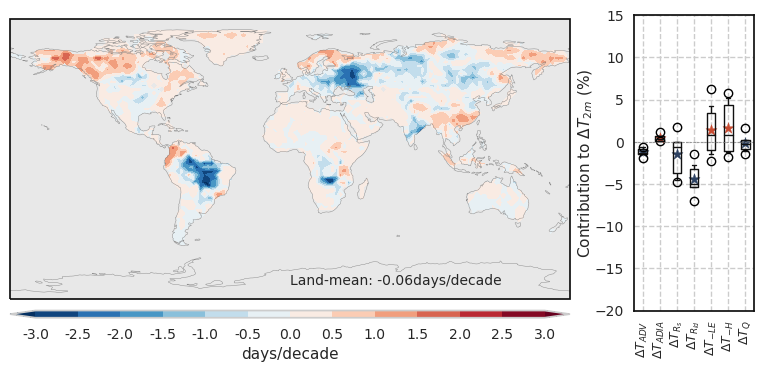

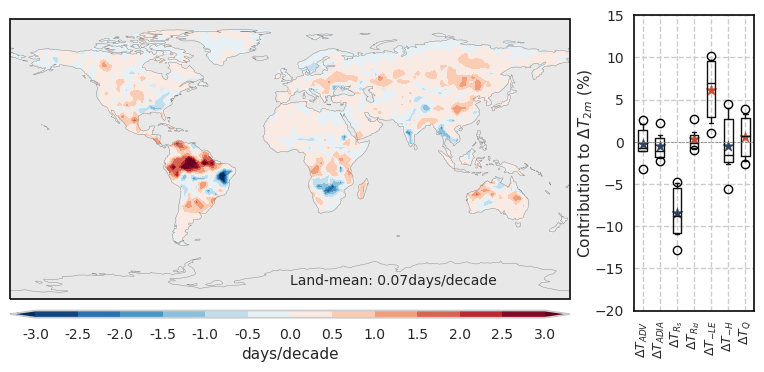

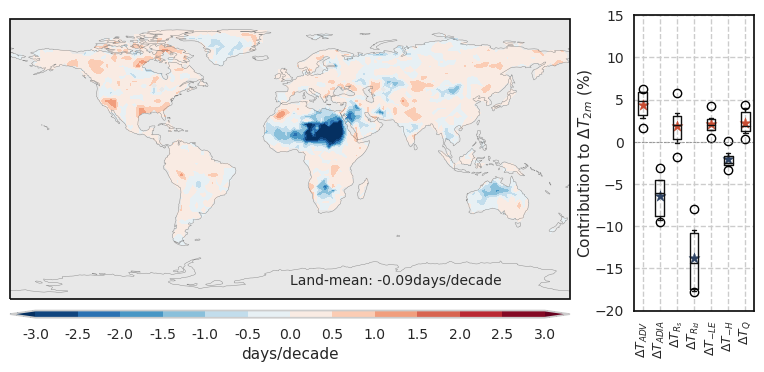

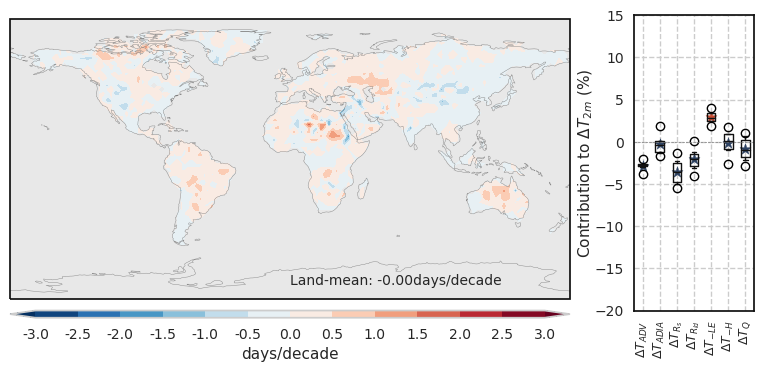

In [ ]:

vername = '_235'
nn=0
for i_label,cmap in zip(label_name,[cm.Blues,cm.Oranges,cm.Greens,cm.Purples,cm.Reds,cm.Reds,cm.Reds,cm.Reds,cm.Reds,cm.Reds]):
    nn=nn+1

    fig= plt.figure(figsize=(8, 3.6))
    proj = ccrs.PlateCarree(central_longitude=0)##
    ax = plt.axes([0.02, 0.17, 0.7, 0.8],projection = proj)
    ax.set_facecolor('#E8E8E8')
  
    con_value = np.nanmean(map_all_all,axis=0)[0][i_label]/3.6-label_map_era5[i_label]/3.6
    con_value[LAT_unin<-60]=np.nan
    con_value[land_mask<0.1]=np.nan

    cmap.set_bad('#d4d4d4',np.nan)

    ax.text(0.5, 0.05,'Land-mean: %.2f' % np.nanmean(con_value)+'days/decade',fontsize=10,transform=ax.transAxes)

    levels = MaxNLocator(nbins=14).tick_values(-3, 3)
    norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

    im = ax.contourf(LON_unin,LAT_unin, con_value, extend='both',levels=levels, cmap='RdBu_r')
    ax.coastlines(color='grey')
 
    lon_formatter = LongitudeFormatter(zero_direction_label=True,
                                    number_format='.0f')
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.set_extent([-180, 180, -90, 90])
    for bnd in ['bottom','top','right','left']:
        ax.spines[bnd].set_color('k')
    ax.spines['geo'].set_color('k')
    cax = plt.axes([0.02, 0.13, 0.7, 0.02])
    for bnd in ['bottom','top','right','left']:
        ax.spines[bnd].set_color('k')
    #ax1.grid(b=False)

    cbar = plt.colorbar(im,cax=cax,orientation='horizontal', shrink=0.8)
    cbar.set_label('days/decade')
    cax.set_xticks(np.arange(-3,3.1,0.5))
    cax.set_xticklabels(np.arange(-3,3.1,0.5))
    #pyplot.show()
    ax = plt.axes([0.8, 0.15, 0.15, 0.82])



    bplot1 = ax.boxplot(np.squeeze(SEB_all[:,0,i_label,:])-SEB_era5[i_label], positions=np.arange(1,8), whis = [10, 90])
    scatter_plot = np.nanmean(np.squeeze(SEB_all[:,0,i_label,:])-SEB_era5[i_label],axis=0)
    for element in ['whiskers','caps','medians','boxes']:
        for patch in bplot1[element] :
            plt.setp(patch, color='k')    

    ax.scatter(np.arange(1,8)[scatter_plot>0],scatter_plot[scatter_plot>0],marker = '*',color=color_heat,s=70)
    ax.scatter(np.arange(1,8)[scatter_plot<0],scatter_plot[scatter_plot<0],marker = '*',color=color_cold,s=70)
    ax.axhline(y = 0, color = 'grey', linestyle = '--',linewidth=0.5)
    ax.set_xticks(range(1,8))
    ax.set_xticklabels(['${\Delta}$$T_{ADV}$','${\Delta}$$T_{ADIA}$','${\Delta}$$T_{R_{s}}$','${\Delta}$$T_{R_{ld}}$','${\Delta}$$T_{-LE}$','${\Delta}$$T_{-H}$','${\Delta}$$T_{Q}$'],rotation=90,fontsize=9)    
    ax.set_ylabel('Contribution to $\Delta$$T_{2m}$ (%)',labelpad=0.1)
    ax.set_ylim(-20,15)
    for bnd in ['bottom','top','right','left']:
        ax.spines[bnd].set_color('k')
    ax.grid(linestyle='--')
    fig.savefig(r'/Net/Groups/BGI/scratch/yt/figure/Heat_wave_3D_99th_connect6/NEW_HW_visit frequency'+str(nn)+vername+'cmip6_delta.jpg', dpi=300)

# trend_percentile

In [9]:
SH_all = []
SD_all = []
ADV_all = []
ADIA_all = []
#for modelname in ['CanESM5/','INM-CM5-0/','INM-CM4-8/']:
for modelname in ['CanESM5/','INM-CM4-8/','INM-CM5-0/','MPI-ESM1-2-LR/','CMCC-ESM2/','MRI-ESM2-0/','IPSL-CM6A-LR/']:
    SH_temp = []
    SD_temp = []
    ADV_temp = []
    ADIA_temp = []
    for yearstart,yearend in zip([1979,2015,2025,2035,2045,2055],[2014,2060,2070,2080,2090,2100]):

        dataframe1 = pd.read_excel('/Net/Groups/BGI/scratch/yt/code/3D_HW_99th_connect6_cmip6_'+modelname+'percentagle_'+modelname[:-1]+'_'+str(yearstart)+'_'+str(yearend)+'.xlsx')
        SH_temp.append(dataframe1[str(yearstart)+'_'+str(yearend)][0])
        SD_temp.append(dataframe1[str(yearstart)+'_'+str(yearend)][1])
        ADV_temp.append(dataframe1[str(yearstart)+'_'+str(yearend)][2])
        ADIA_temp.append(dataframe1[str(yearstart)+'_'+str(yearend)][3])
    SH_all.append(np.array(SH_temp ))
    SD_all.append(np.array(SD_temp ))
    ADV_all.append(np.array(ADV_temp ))
    ADIA_all.append(np.array(ADIA_temp ))

In [10]:
SH_all=np.array(SH_all)
SD_all=np.array(SD_all)
ADV_all=np.array(ADV_all)
ADIA_all=np.array(ADIA_all)



In [11]:
print(np.nanmean(SH_all[:,-1]-SH_all[:,1],axis=0))
print(np.nanmean(SD_all[:,-1]-SD_all[:,1],axis=0))
print(np.nanmean(ADV_all[:,-1]-ADV_all[:,1],axis=0))
print(np.nanmean(ADIA_all[:,-1]-ADIA_all[:,1],axis=0))

-3.219960283079911
3.4127305655062727
1.5189339211596178
-1.711704203585984


In [12]:
print(np.nanmin(SH_all[:,-1]-SH_all[:,1],axis=0))
print(np.nanmin(SD_all[:,-1]-SD_all[:,1],axis=0))
print(np.nanmin(ADV_all[:,-1]-ADV_all[:,1],axis=0))
print(np.nanmin(ADIA_all[:,-1]-ADIA_all[:,1],axis=0))

-5.634544581597787
3.01154580102601
0.7796863994488987
-2.44105605185028


In [13]:
print(np.nanmax(SH_all[:,-1]-SH_all[:,1],axis=0))
print(np.nanmax(SD_all[:,-1]-SD_all[:,1],axis=0))
print(np.nanmax(ADV_all[:,-1]-ADV_all[:,1],axis=0))
print(np.nanmax(ADIA_all[:,-1]-ADIA_all[:,1],axis=0))

-1.4426095504673206
3.9875247542356433
3.8798375085277996
-1.230705912101559


# Fig. 5a

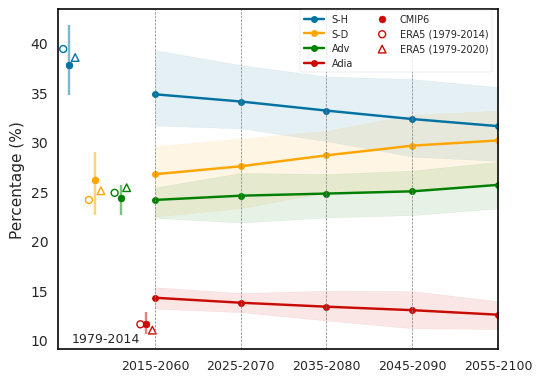

In [19]:
fig= plt.figure(figsize=(5.5,4))
proj = ccrs.PlateCarree(central_longitude=0)##
ax = plt.axes([0.11, 0.1, 0.8, 0.85])
ax.plot(np.arange(6)[1:],np.nanmean(SH_all,axis=0)[1:],label='S-H',color='b',marker='.',markersize=10)
ax.fill_between(np.arange(6)[1:],np.nanpercentile(SH_all,10,axis=0)[1:],np.nanpercentile(SH_all,90,axis=0)[1:],alpha=0.1,color='b')
ax.plot(np.arange(6)[1:],np.nanmean(SD_all,axis=0)[1:],label='S-D',color='orange',marker='.',markersize=10)
ax.fill_between(np.arange(6)[1:],np.nanpercentile(SD_all,10,axis=0)[1:],np.nanpercentile(SD_all,90,axis=0)[1:],alpha=0.1,color='orange')
ax.plot(np.arange(6)[1:],np.nanmean(ADV_all,axis=0)[1:],label='Adv',color='green',marker='.',markersize=10)
ax.fill_between(np.arange(6)[1:],np.nanpercentile(ADV_all,10,axis=0)[1:],np.nanpercentile(ADV_all,90,axis=0)[1:],alpha=0.1,color='green')
ax.plot(np.arange(6)[1:],np.nanmean(ADIA_all,axis=0)[1:],label='Adia',color='r',marker='.',markersize=10)
ax.fill_between(np.arange(6)[1:],np.nanpercentile(ADIA_all,10,axis=0)[1:],np.nanpercentile(ADIA_all,90,axis=0)[1:],alpha=0.1,color='r')
ax.spines['right'].set_color('k')
ax.spines['left'].set_color('k')
ax.spines['bottom'].set_color('k')
ax.spines['top'].set_color('k')
# for bnd in ['bottom','top','right','left']:
#     ax.spines[bnd].set_color('k')
ax.grid(False)
#ax.axvline(x = 0, color = 'grey', linestyle = '--',linewidth=0.5)
ax.axvline(x = 1, color = 'grey', linestyle = '--',linewidth=0.5)
ax.axvline(x = 2 ,color = 'grey', linestyle = '--',linewidth=0.5)
ax.axvline(x = 3, color = 'grey', linestyle = '--',linewidth=0.5)
ax.axvline(x = 4, color = 'grey', linestyle = '--',linewidth=0.5)
plt.xticks([1,2,3,4,5],['2015-2060','2025-2070','2035-2080','2045-2090','2055-2100'],fontsize=9)
ax.text(0.03, 0.02,'1979-2014',fontsize=9,transform=ax.transAxes)
plt.xlim((-0.13,5))
plt.ylabel('Percentage (%)')



plt.scatter([0],[np.nanmean(SH_all[:,0])],color='b',marker='.',s=100)
plt.scatter([0.3],[np.nanmean(SD_all[:,0])],color='orange',marker='.',s=100)
plt.scatter([0.6],[np.nanmean(ADV_all[:,0])],color='green',marker='.',s=100)
plt.scatter([0.9],[np.nanmean(ADIA_all[:,0])],color='r',marker='.',s=100,label='CMIP6')


plt.scatter([0-0.07],[39.40],color='b',marker='.',s=100,facecolors='none', linewidth=1)
plt.scatter([0.3-0.07],[24.15],color='orange',marker='.',s=100,facecolors='none', linewidth=1)
plt.scatter([0.6-0.07],[24.87],color='green',marker='.',s=100,facecolors='none', linewidth=1)
plt.scatter([0.9-0.07],[11.59],color='r',marker='.',s=100,facecolors='none', linewidth=1,label='ERA5 (1979-2014)')

plt.scatter([0+0.07],[38.54],color='b',marker='^',s=30,facecolors='none', linewidth=1)
plt.scatter([0.3+0.07],[25.08],color='orange',marker='^',s=30,facecolors='none', linewidth=1)
plt.scatter([0.6+0.07],[25.39],color='green',marker='^',s=30,facecolors='none', linewidth=1)
plt.scatter([0.9+0.07],[11.00],color='r',marker='^',s=30,facecolors='none', linewidth=1,label='ERA5 (1979-2020)')

plt.scatter([0],[np.nanmean(SH_all[:,0])],color='b',marker='.',s=50)
plt.scatter([0.3],[np.nanmean(SD_all[:,0])],color='orange',marker='.',s=50)
plt.scatter([0.6],[np.nanmean(ADV_all[:,0])],color='green',marker='.',s=50)
plt.scatter([0.9],[np.nanmean(ADIA_all[:,0])],color='r',marker='.',s=50)

plt.errorbar([0.0], np.nanmean(SH_all[:,0]), yerr=[[-np.nanpercentile(SH_all,10,axis=0)[0]+np.nanmean(SH_all[:,0])],[np.nanpercentile(SH_all,90,axis=0)[0]-np.nanmean(SH_all[:,0])]], fmt='-o',alpha=0.5,markersize=5,color='b')
plt.errorbar([0.3], np.nanmean(SD_all[:,0]), yerr=[[-np.nanpercentile(SD_all,10,axis=0)[0]+np.nanmean(SD_all[:,0])],[np.nanpercentile(SD_all,90,axis=0)[0]-np.nanmean(SD_all[:,0])]], fmt='-o',alpha=0.5,markersize=5,color='orange')
plt.errorbar([0.6], np.nanmean(ADV_all[:,0]), yerr=[[-np.nanpercentile(ADV_all,10,axis=0)[0]+np.nanmean(ADV_all[:,0])],[np.nanpercentile(ADV_all,90,axis=0)[0]-np.nanmean(ADV_all[:,0])]], fmt='-o',alpha=0.5,markersize=5,color='green')
plt.errorbar([0.9], np.nanmean(ADIA_all[:,0]), yerr=[[-np.nanpercentile(ADIA_all,10,axis=0)[0]+np.nanmean(ADIA_all[:,0])],[np.nanpercentile(ADIA_all,90,axis=0)[0]-np.nanmean(ADIA_all[:,0])]], fmt='-o',alpha=0.5,markersize=5,color='r')

plt.legend(ncol=2,fontsize=7,bbox_to_anchor=(0.54,0.8),frameon='True')
plt.savefig('try_percentile.jpg',dpi=300)

# trend_abs

In [12]:
SH_all = []
SD_all = []
ADV_all = []
ADIA_all = []
#for modelname in ['CanESM5/','INM-CM5-0/','INM-CM4-8/']:
for modelname in ['CanESM5/','INM-CM4-8/','INM-CM5-0/','MPI-ESM1-2-LR/','CMCC-ESM2/','IPSL-CM6A-LR/']:
    SH_temp = []
    SD_temp = []
    ADV_temp = []
    ADIA_temp = []
    for yearstart,yearend in zip([1979,2015,2025,2035,2045,2055],[2014,2060,2070,2080,2090,2100]):

        dataframe1 = pd.read_excel('/Net/Groups/BGI/scratch/yt/code/3D_HW_99th_connect6_cmip6_'+modelname+'abs_'+modelname[:-1]+'_'+str(yearstart)+'_'+str(yearend)+'.xlsx')
        SH_temp.append(dataframe1[str(yearstart)+'_'+str(yearend)][0])
        SD_temp.append(dataframe1[str(yearstart)+'_'+str(yearend)][1])
        ADV_temp.append(dataframe1[str(yearstart)+'_'+str(yearend)][2])
        ADIA_temp.append(dataframe1[str(yearstart)+'_'+str(yearend)][3])
    SH_all.append(np.array(SH_temp ))
    SD_all.append(np.array(SD_temp ))
    ADV_all.append(np.array(ADV_temp ))
    ADIA_all.append(np.array(ADIA_temp ))

In [13]:
SH_all=np.array(SH_all)/46
SD_all=np.array(SD_all)/46
ADV_all=np.array(ADV_all)/46
ADIA_all=np.array(ADIA_all)/46

SH_all[:,0] = SH_all[:,0]*46/(2014-1979+1)
SD_all[:,0] = SD_all[:,0]*46/(2014-1979+1)
ADV_all[:,0] = ADV_all[:,0]*46/(2014-1979+1)
ADIA_all[:,0] = ADIA_all[:,0]*46/(2014-1979+1)


In [15]:
print(np.nanmean(SH_all[:,-1]-SH_all[:,1],axis=0))
print(np.nanmean(SD_all[:,-1]-SD_all[:,1],axis=0))
print(np.nanmean(ADV_all[:,-1]-ADV_all[:,1],axis=0))
print(np.nanmean(ADIA_all[:,-1]-ADIA_all[:,1],axis=0))

-22.601407608695663
32.56571739130436
14.85624456521738
-12.393970108695651


In [16]:
print(np.nanmin(SH_all[:,-1]-SH_all[:,1],axis=0))
print(np.nanmin(SD_all[:,-1]-SD_all[:,1],axis=0))
print(np.nanmin(ADV_all[:,-1]-ADV_all[:,1],axis=0))
print(np.nanmin(ADIA_all[:,-1]-ADIA_all[:,1],axis=0))

-44.43652173913047
20.860108695652208
4.587228260869516
-19.22894021739131


In [17]:
print(np.nanmax(SH_all[:,-1]-SH_all[:,1],axis=0))
print(np.nanmax(SD_all[:,-1]-SD_all[:,1],axis=0))
print(np.nanmax(ADV_all[:,-1]-ADV_all[:,1],axis=0))
print(np.nanmax(ADIA_all[:,-1]-ADIA_all[:,1],axis=0))

-7.296603260869588
45.73831521739133
23.06641304347827
-7.842866847826102


# Fig. 5b

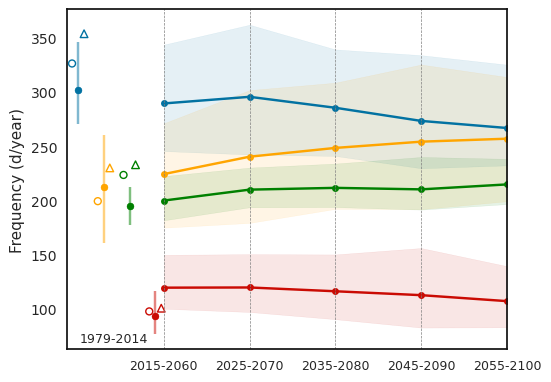

In [20]:
fig= plt.figure(figsize=(5.5,4))
proj = ccrs.PlateCarree(central_longitude=0)##
ax = plt.axes([0.11, 0.1, 0.8, 0.85])
ax.plot(np.arange(6)[1:],np.nanmean(SH_all,axis=0)[1:],label='S-H',color='b',marker='.',markersize=10)
ax.fill_between(np.arange(6)[1:],np.nanpercentile(SH_all,10,axis=0)[1:],np.nanpercentile(SH_all,90,axis=0)[1:],alpha=0.1,color='b')
ax.plot(np.arange(6)[1:],np.nanmean(SD_all,axis=0)[1:],label='S-D',color='orange',marker='.',markersize=10)
ax.fill_between(np.arange(6)[1:],np.nanpercentile(SD_all,10,axis=0)[1:],np.nanpercentile(SD_all,90,axis=0)[1:],alpha=0.1,color='orange')
ax.plot(np.arange(6)[1:],np.nanmean(ADV_all,axis=0)[1:],label='Adv',color='green',marker='.',markersize=10)
ax.fill_between(np.arange(6)[1:],np.nanpercentile(ADV_all,10,axis=0)[1:],np.nanpercentile(ADV_all,90,axis=0)[1:],alpha=0.1,color='green')
ax.plot(np.arange(6)[1:],np.nanmean(ADIA_all,axis=0)[1:],label='Adia',color='r',marker='.',markersize=10)
ax.fill_between(np.arange(6)[1:],np.nanpercentile(ADIA_all,10,axis=0)[1:],np.nanpercentile(ADIA_all,90,axis=0)[1:],alpha=0.1,color='r')
ax.spines['right'].set_color('k')
ax.spines['left'].set_color('k')
ax.spines['bottom'].set_color('k')
ax.spines['top'].set_color('k')
# for bnd in ['bottom','top','right','left']:
#     ax.spines[bnd].set_color('k')
ax.grid(False)
#ax.axvline(x = 0, color = 'grey', linestyle = '--',linewidth=0.5)
ax.axvline(x = 1, color = 'grey', linestyle = '--',linewidth=0.5)
ax.axvline(x = 2 ,color = 'grey', linestyle = '--',linewidth=0.5)
ax.axvline(x = 3, color = 'grey', linestyle = '--',linewidth=0.5)
ax.axvline(x = 4, color = 'grey', linestyle = '--',linewidth=0.5)
plt.xticks([1,2,3,4,5],['2015-2060','2025-2070','2035-2080','2045-2090','2055-2100'],fontsize=9)
ax.text(0.03, 0.02,'1979-2014',fontsize=9,transform=ax.transAxes)
plt.xlim((-0.13,5))
plt.ylabel('Frequency (d/year)')



plt.scatter([0],[np.nanmean(SH_all[:,0])],color='b',marker='.',s=100)
plt.scatter([0.3],[np.nanmean(SD_all[:,0])],color='orange',marker='.',s=100)
plt.scatter([0.6],[np.nanmean(ADV_all[:,0])],color='green',marker='.',s=100)
plt.scatter([0.9],[np.nanmean(ADIA_all[:,0])],color='r',marker='.',s=100,label='CMIP6')



plt.scatter([0-0.07],[11419.0/35],color='b',marker='.',s=100,facecolors='none', linewidth=1)
plt.scatter([0.3-0.07],[6982.0/35],color='orange',marker='.',s=100,facecolors='none', linewidth=1)
plt.scatter([0.6-0.07],[7827.0/35],color='green',marker='.',s=100,facecolors='none', linewidth=1)
plt.scatter([0.9-0.07],[3429.0/35],color='r',marker='.',s=100,facecolors='none', linewidth=1,label='ERA5 (1979-2014)')

plt.scatter([0+0.07],[14853.0/42],color='b',marker='^',s=30,facecolors='none', linewidth=1)
plt.scatter([0.3+0.07],[9665.0/42],color='orange',marker='^',s=30,facecolors='none', linewidth=1)
plt.scatter([0.6+0.07],[9786.0/42],color='green',marker='^',s=30,facecolors='none', linewidth=1)
plt.scatter([0.9+0.07],[4239.0/42],color='r',marker='^',s=30,facecolors='none', linewidth=1,label='ERA5 (1979-2020)')


plt.errorbar([0.0], np.nanmean(SH_all[:,0]), yerr=[[-np.nanpercentile(SH_all,10,axis=0)[0]+np.nanmean(SH_all[:,0])],[np.nanpercentile(SH_all,90,axis=0)[0]-np.nanmean(SH_all[:,0])]], fmt='-o',alpha=0.5,markersize=5,color='b')
plt.errorbar([0.3], np.nanmean(SD_all[:,0]), yerr=[[-np.nanpercentile(SD_all,10,axis=0)[0]+np.nanmean(SD_all[:,0])],[np.nanpercentile(SD_all,90,axis=0)[0]-np.nanmean(SD_all[:,0])]], fmt='-o',alpha=0.5,markersize=5,color='orange')
plt.errorbar([0.6], np.nanmean(ADV_all[:,0]), yerr=[[-np.nanpercentile(ADV_all,10,axis=0)[0]+np.nanmean(ADV_all[:,0])],[np.nanpercentile(ADV_all,90,axis=0)[0]-np.nanmean(ADV_all[:,0])]], fmt='-o',alpha=0.5,markersize=5,color='green')
plt.errorbar([0.9], np.nanmean(ADIA_all[:,0]), yerr=[[-np.nanpercentile(ADIA_all,10,axis=0)[0]+np.nanmean(ADIA_all[:,0])],[np.nanpercentile(ADIA_all,90,axis=0)[0]-np.nanmean(ADIA_all[:,0])]], fmt='-o',alpha=0.5,markersize=5,color='r')

# plt.legend(ncol=2)
plt.savefig('try_abs.jpg',dpi=300)